In [1]:
%matplotlib inline
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt
import statistics as stat

# Here I define the k means datafaker

In [4]:
def k_means_datafaker(k, centroid_list, dist_chars_list, points_splt):
    
    if len(centroid_list) != k:
        print('You ust provide a centroid x,y pair for every cluster')
    if len(dist_chars_list) != k:
        print('You ust provide a covariance matrix for every cluster')
    if len(points_splt) != k:
        print('You ust provide a number of points for every cluster')
        
    total_points = sum(points_splt)    
    points = np.empty([total_points,3])
    
    index = 0
    for i in range(k):

        centroid = centroid_list[i]
        dist_chars = dist_chars_list[i]
        p = points_splt[i]

        points_in_cluster = np.random.multivariate_normal(centroid,dist_chars,p)
        
        points[index:index+p,:2] = points_in_cluster
        points[index:index+p,2] = i+1

        index = index+p

    return points

# Here is an example of the use of the datafaker

We will generate data in 3 clusters

centroid_list is a list of arrays whit the x,y coordinates of each cluster /n

cov_list is a list of matrices with the variance covariance of the gaussian distributions

points_split is a list of integers whith the number of points you want from each cluster

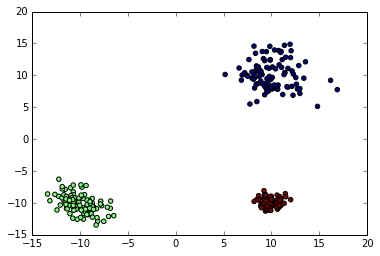

In [6]:
centroid_list = [np.array([10,10]), np.array([-10,-10]), np.array([10,-10])]
cov_list = [np.array([[5,0],[0,5]]), np.array([[2,-1],[-1,2]]), np.array([[0.5,0],[0,0.5]])]
points_split = [100,100,100]

test_points_3k = k_means_datafaker(3, centroid_list, cov_list, points_split)
plt.scatter(test_points_3k[:,0],test_points_3k[:,1], c = test_points_3k[:,2])

# Here is the kmeans function as coded by gpicot

I have made no modificastions at this point

In [7]:
def kmeans(points, k,prec=0.0001,m=1):
    l=len(points)
    if k > l:
        print ('The partitioning is impossible')
    else:
        centroids = np.empty([k,2])
        for j in range(0, k):
            centroids[j,:]=points[j,:]
        while (m > prec):
            new_centroids=np.empty([k,2])
            list_index=[]
            for i in range(0,l):
                list_dist=[]
                for j in range(0,k):
                    dist=np.linalg.norm(points[i,:] - centroids[j,:])
                    list_dist.append(dist)
                min_index=np.argmin(list_dist)
                list_index.append(min_index)
            for j in range(0,k):
                indeces=np.where(np.asarray(list_index)==j)[0]
                if len(indeces) > 0:
                    new_centroids[j,:]=sum(points[indeces])/(len(indeces))
                else:
                    rand_int=rd.randint(0,l-1)
                    new_centroids[j,:]=points[rand_int,:]
            m=np.linalg.norm(centroids - new_centroids)
            centroids=new_centroids
            
        list_diameter=[]   
        for j in range(0,k):
            indeces=np.where(np.asarray(list_index)==j)[0]
            diameter=math.sqrt(sum(np.linalg.norm(points[indeces]- centroids[j,:],axis=1)**2)/len(indeces))
            list_diameter.append(diameter)
        Matrix_DB= np.zeros([k,k])
        for i in range(0,k):
            for j in range(0,i-1):
                Matrix_DB[i,j]=(list_diameter[i]+list_diameter[j])/(np.linalg.norm(centroids[i,:]-centroids[j,:]))
            for j in range(i+1,k):
                Matrix_DB[i,j]=(list_diameter[i]+list_diameter[j])/(np.linalg.norm(centroids[i,:]-centroids[j,:])) 
            
        DB=sum(np.amax(Matrix_DB, axis=1))/k
    
    
    return centroids, list_index, m, DB

# Let's test the kmeans function

## Lets start with two clusters

This works pretty well

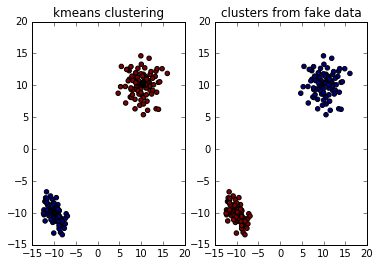

In [16]:
centroid_list_2k = [np.array([10,10]), 
                    np.array([-10,-10])]
cov_list_2k = [np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]])]
points_split_2k = [100,100]

test_points_2k = k_means_datafaker(2, centroid_list_2k, cov_list_2k, points_split_2k)

points= test_points_2k[:,:2]
centro, listo,mo,DBo=kmeans(points,2)

fig, axs = plt.subplots(1,2)

axs[0].scatter(points[:,0], points[:,1], c=listo)
axs[0].scatter(centro[:,0], centro[:,1],marker='o',color='black', s=40)
axs[0].set_title('kmeans clustering')

axs[1].scatter(test_points_2k[:,0], test_points_2k[:,1], c=test_points_2k[:,2])
axs[1].set_title('clusters from fake data')
#axs[1].scatter(centroid_list_5k[:,0], centroid_list_5k[:,1],marker='o',color='black', s=40)

## But it has some problems!!!

If there are two clusters with the same y position or close the kmeans algorith tends to make them into a single cluster

The top experiment has two clusters with y = -10

the bottom experiment has two clusters with y =-10 and y=-9

When i ran these experiments, the kmeans algorith put the bottom two clusters into one ans split the top cluster into two most of the time. Sometimes it got it right.

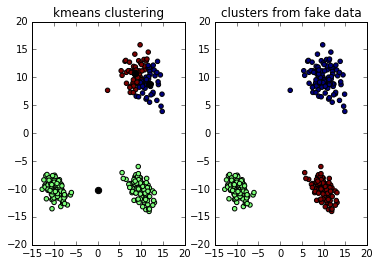

In [31]:
centroid_list_3k = [np.array([10,10]), 
                    np.array([-10,-10]),
                    np.array([10,-10])]
cov_list_3k = [np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]]),
               np.array([[2,-1],[-1,2]])]
points_split_3k = [100,100,100]

test_points_3k = k_means_datafaker(3, centroid_list_3k, cov_list_3k, points_split_3k)

points= test_points_3k[:,:2]
centro, listo,mo,DBo=kmeans(points,3)

fig, axs = plt.subplots(1,2)

axs[0].scatter(points[:,0], points[:,1], c=listo)
axs[0].scatter(centro[:,0], centro[:,1],marker='o',color='black', s=40)
axs[0].set_title('kmeans clustering')

axs[1].scatter(test_points_3k[:,0], test_points_3k[:,1], c=test_points_3k[:,2])
axs[1].set_title('clusters from fake data')

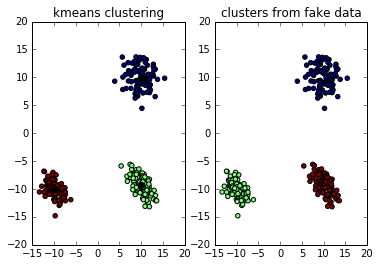

In [30]:
centroid_list_3k = [np.array([10,10]), 
                    np.array([-10,-10]),
                    np.array([10,-9])]
cov_list_3k = [np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]]),
               np.array([[2,-1],[-1,2]])]
points_split_3k = [100,100,100]

test_points_3k = k_means_datafaker(3, centroid_list_3k, cov_list_3k, points_split_3k)

points= test_points_3k[:,:2]
centro, listo,mo,DBo=kmeans(points,3)

fig, axs = plt.subplots(1,2)

axs[0].scatter(points[:,0], points[:,1], c=listo)
axs[0].scatter(centro[:,0], centro[:,1],marker='o',color='black', s=40)
axs[0].set_title('kmeans clustering')

axs[1].scatter(test_points_3k[:,0], test_points_3k[:,1], c=test_points_3k[:,2])
axs[1].set_title('clusters from fake data')

## How about for 5 clusters

The kmeans algorith arrived at suboptimal solutions most of the time! putting the two bottom clusters in one or sometimes the three bottom clusters into one, and splitting the top clusters into two or three!

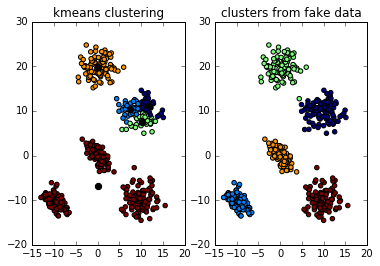

In [34]:
centroid_list_5k = [np.array([10,10]), 
                    np.array([-10,-10]), 
                    np.array([0,20]), 
                    np.array([0,0]),
                    np.array([10,-10])]
cov_list_5k = [np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]]),
               np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]]),
               np.array([[5,0],[0,5]])]
points_split_5k = [100,100,100,100,100]

test_points_5k = k_means_datafaker(5, centroid_list_5k, cov_list_5k, points_split_5k)

points= test_points_5k[:,:2]
centro, listo,mo,DBo=kmeans(points,5)

fig, axs = plt.subplots(1,2)

axs[0].scatter(points[:,0], points[:,1], c=listo)
axs[0].scatter(centro[:,0], centro[:,1],marker='o',color='black', s=40)
axs[0].set_title('kmeans clustering')

axs[1].scatter(test_points_5k[:,0], test_points_5k[:,1], c=test_points_5k[:,2])
axs[1].set_title('clusters from fake data')
#axs[1].scatter(centroid_list_5k[:,0], centroid_list_5k[:,1],marker='o',color='black', s=40)

# Here I started to work on the comparison function

In [35]:
def comparison_function(generating_centroids, kmeans_centroids):
    
    distance_array = np.empty([len(generating_centroids)*len(kmeans_centroids),3])
    assigment_array = np.empty([len(generating_centroids),3])
    
    for i, gen_cent in enumerate(genertating_centroids):
        for j, kmeans_cent in enumerate(kmeans_centroids):
            
            x_1 = genertating_centroids[i][0]
            y_1 = genertating_centroids[i][1]
            
            x_2 = kmeans_centroids[j][0]
            y_2 = kmeans_centroids[j][1]
            
            distance = np.sqrt(np.square(x_1 - x_2) + np.square(y_1 - y_2))
            
            